In [1]:
####### IMPORTS
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import shapely.geometry
from IPython.core.display import display, HTML
import glob
import os
import pickle
from shapely.geometry import Polygon
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\rmpjazz\AppData\Local\Temp\ipykernel_99396\1842139673.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<IPython.core.display.Javascript object>


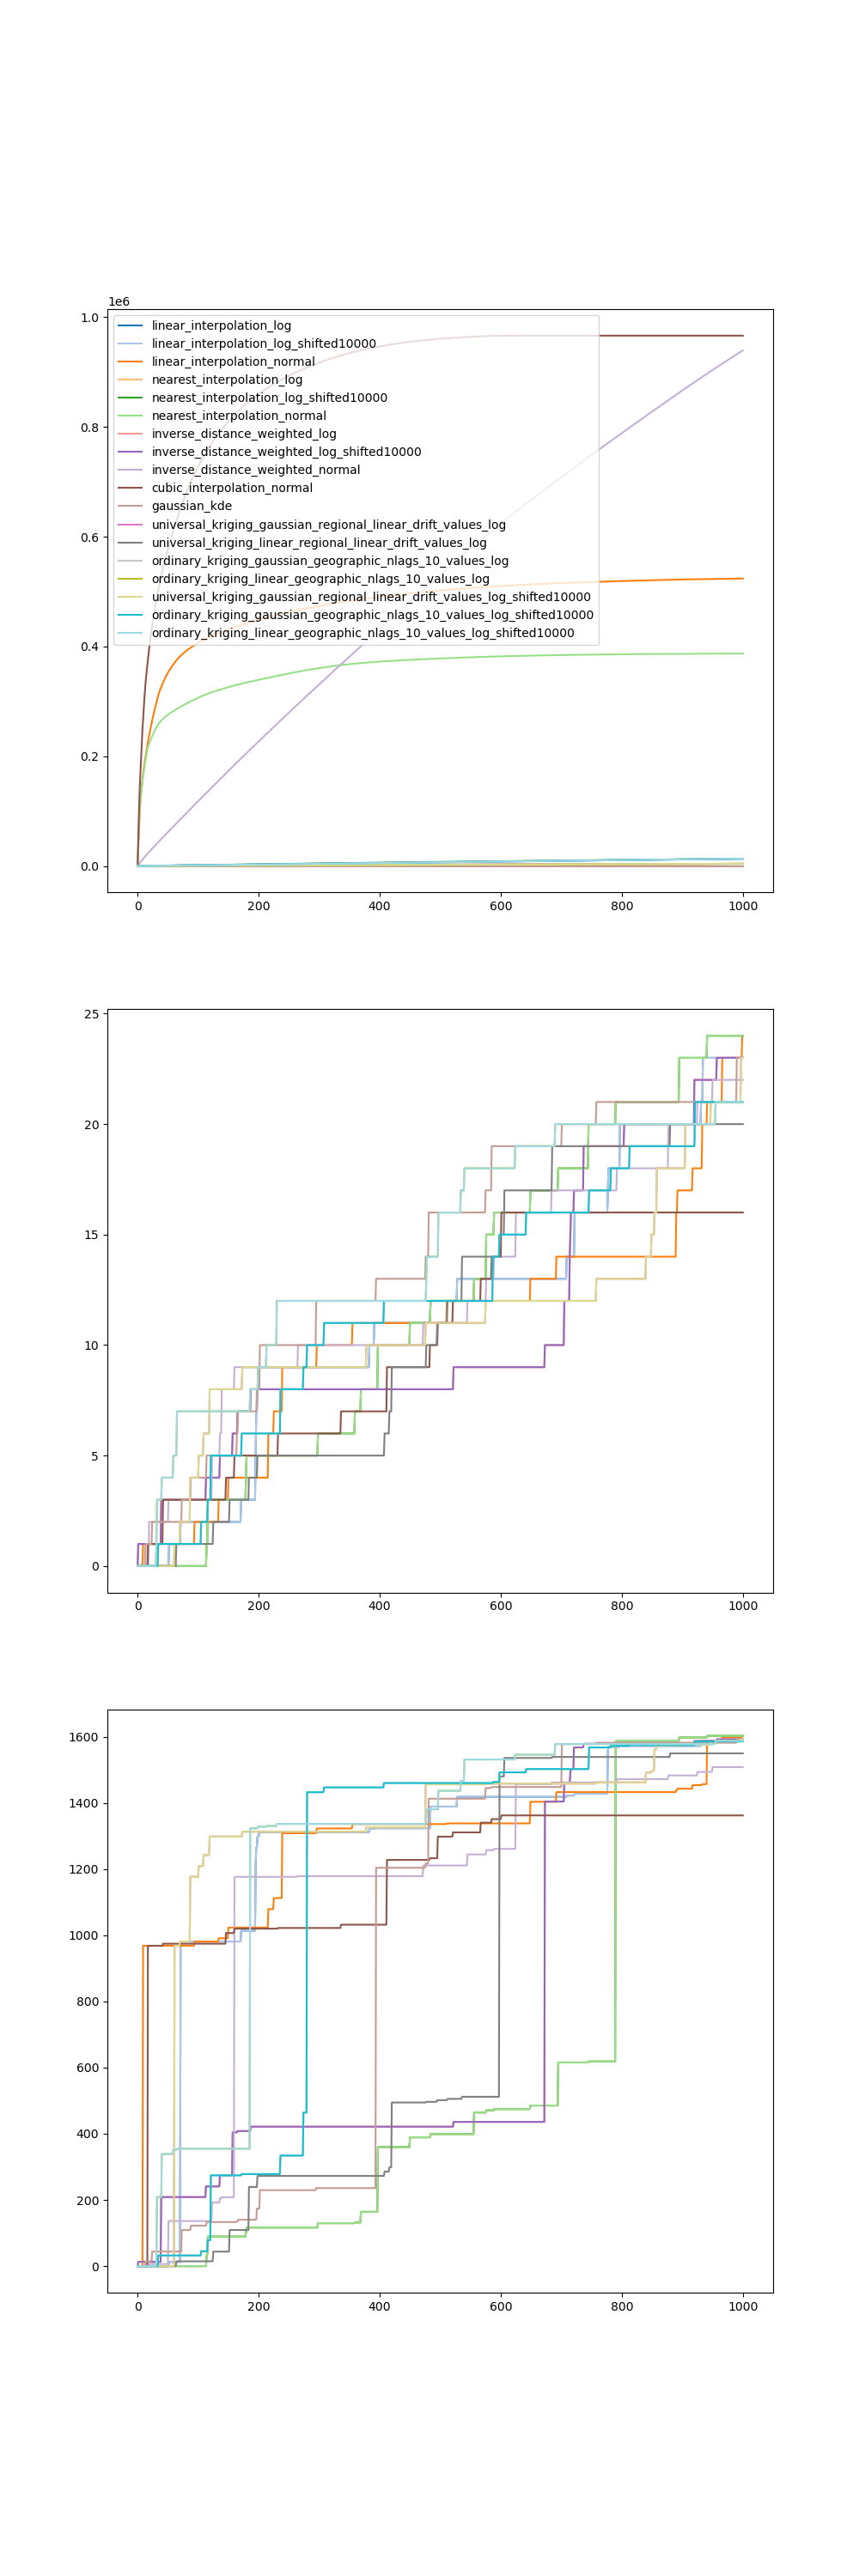

In [14]:
%matplotlib notebook
interpolations = ["linear_interpolation_log", "linear_interpolation_log_shifted10000", "linear_interpolation_normal", #SEE HOW MUCH SHIFTED IS BEST
                  "nearest_interpolation_log", "nearest_interpolation_log_shifted10000", "nearest_interpolation_normal",
                  "inverse_distance_weighted_log", "inverse_distance_weighted_log_shifted10000", "inverse_distance_weighted_normal", "inverse_distance_weighted_power_0.2_normal"
                  "cubic_interpolation_log", "cubic_interpolation_normal",
                  "gaussian_kde", 
                  "universal_kriging_gaussian_regional_linear_drift_values_log", "universal_kriging_linear_regional_linear_drift_values_log",
                  "ordinary_kriging_gaussian_geographic_nlags_10_values_log", "ordinary_kriging_linear_geographic_nlags_10_values_log",\
                  "universal_kriging_gaussian_regional_linear_drift_values_log_shifted10000", # don't have time to generate this one mb "universal_kriging_linear_regional_linear_drift_values_log_shifted10000"
                  "ordinary_kriging_gaussian_geographic_nlags_10_values_log_shifted10000", "ordinary_kriging_linear_geographic_nlags_10_values_log_shifted10000",
                 ]
xs = []
y1s = []
y2s = []
y3s = []
labels = []
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,30), clear = True)

for size in [1]:
    for interpchoose in interpolations:
        todir = os.path.join(os.getcwd(), 'tradeoff_results', str(size)+'x' + str(size), interpchoose)
        if (not os.path.exists(todir)):
            continue
        with open(todir, 'rb') as fp:
            res = pickle.load(fp)
            x = res[0]
            y1 = res[1]
            y2 = res[2]
            y3 = res[3]
            labels.append(interpchoose)
            xs.append(x)
            y1s.append(y1)
            y2s.append(y2)
            y3s.append(y3)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(xs))]
colornum = 0
for ind in range(len(xs)):
    ax[0].plot(xs[ind], y1s[ind], label = labels[ind], color = colors[colornum])
    ax[1].plot(xs[ind], y2s[ind], label = labels[ind], color = colors[colornum])
    ax[2].plot(xs[ind], y3s[ind], label = labels[ind], color = colors[colornum])
    colornum += 1

    
ax[0].legend()
# ax[1].legend()
# ax[2].legend()
plt.show()

In [20]:
len(xs)

54

In [36]:
xs = []
y1s = []
y2s = []
y3s = []
labels = []
for size in [1]:
    for interpchoose in interpolations:
        todir = os.path.join(os.getcwd(), 'tradeoff_results', str(size)+'x' + str(size), interpchoose)
        if (not os.path.exists(todir)):
            continue
        with open(todir, 'rb') as fp:
            res = pickle.load(fp)
            x = res[0]
            y1 = res[1]
            y2 = res[2]
            y3 = res[3]
            labels.append(interpchoose)
            xs.append(x)
            y1s.append(y1)
            y2s.append(y2)
            y3s.append(y3)
scores = {}
for xvalue in range(0,1001,5):
    ar = []
    for ind in range(len(xs)):
        ar.append((y2s[ind][xvalue], labels[ind]))
    ar.sort()
#     print(ar)
    for i in range(len(xs)):
        if (ar[i][1] not in scores.keys()):
            scores[ar[i][1]] = i
        else:
            scores[ar[i][1]] += i
            
    ar = []
    for ind in range(len(xs)):
        ar.append((y3s[ind][xvalue], labels[ind]))
    ar.sort()
#     print(ar)
    for i in range(len(xs)):
        if (ar[i][1] not in scores.keys()):
            scores[ar[i][1]] = i
        else:
            scores[ar[i][1]] += i
end = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}
for i in end.keys():
    print(i + ":" + str(end[i]))

cubic_interpolation_normal:2047
nearest_interpolation_log:2315
universal_kriging_linear_regional_linear_drift_values_log:2588
inverse_distance_weighted_log:2623
nearest_interpolation_log_shifted10000:2717
linear_interpolation_log:3007
inverse_distance_weighted_log_shifted10000:3025
inverse_distance_weighted_normal:3053
linear_interpolation_normal:3056
nearest_interpolation_normal:3119
linear_interpolation_log_shifted10000:3409
universal_kriging_gaussian_regional_linear_drift_values_log:3429
ordinary_kriging_gaussian_geographic_nlags_10_values_log:3765
universal_kriging_gaussian_regional_linear_drift_values_log_shifted10000:3831
ordinary_kriging_gaussian_geographic_nlags_10_values_log_shifted10000:4167
gaussian_kde:4373
ordinary_kriging_linear_geographic_nlags_10_values_log:5290
ordinary_kriging_linear_geographic_nlags_10_values_log_shifted10000:5692


<IPython.core.display.Javascript object>


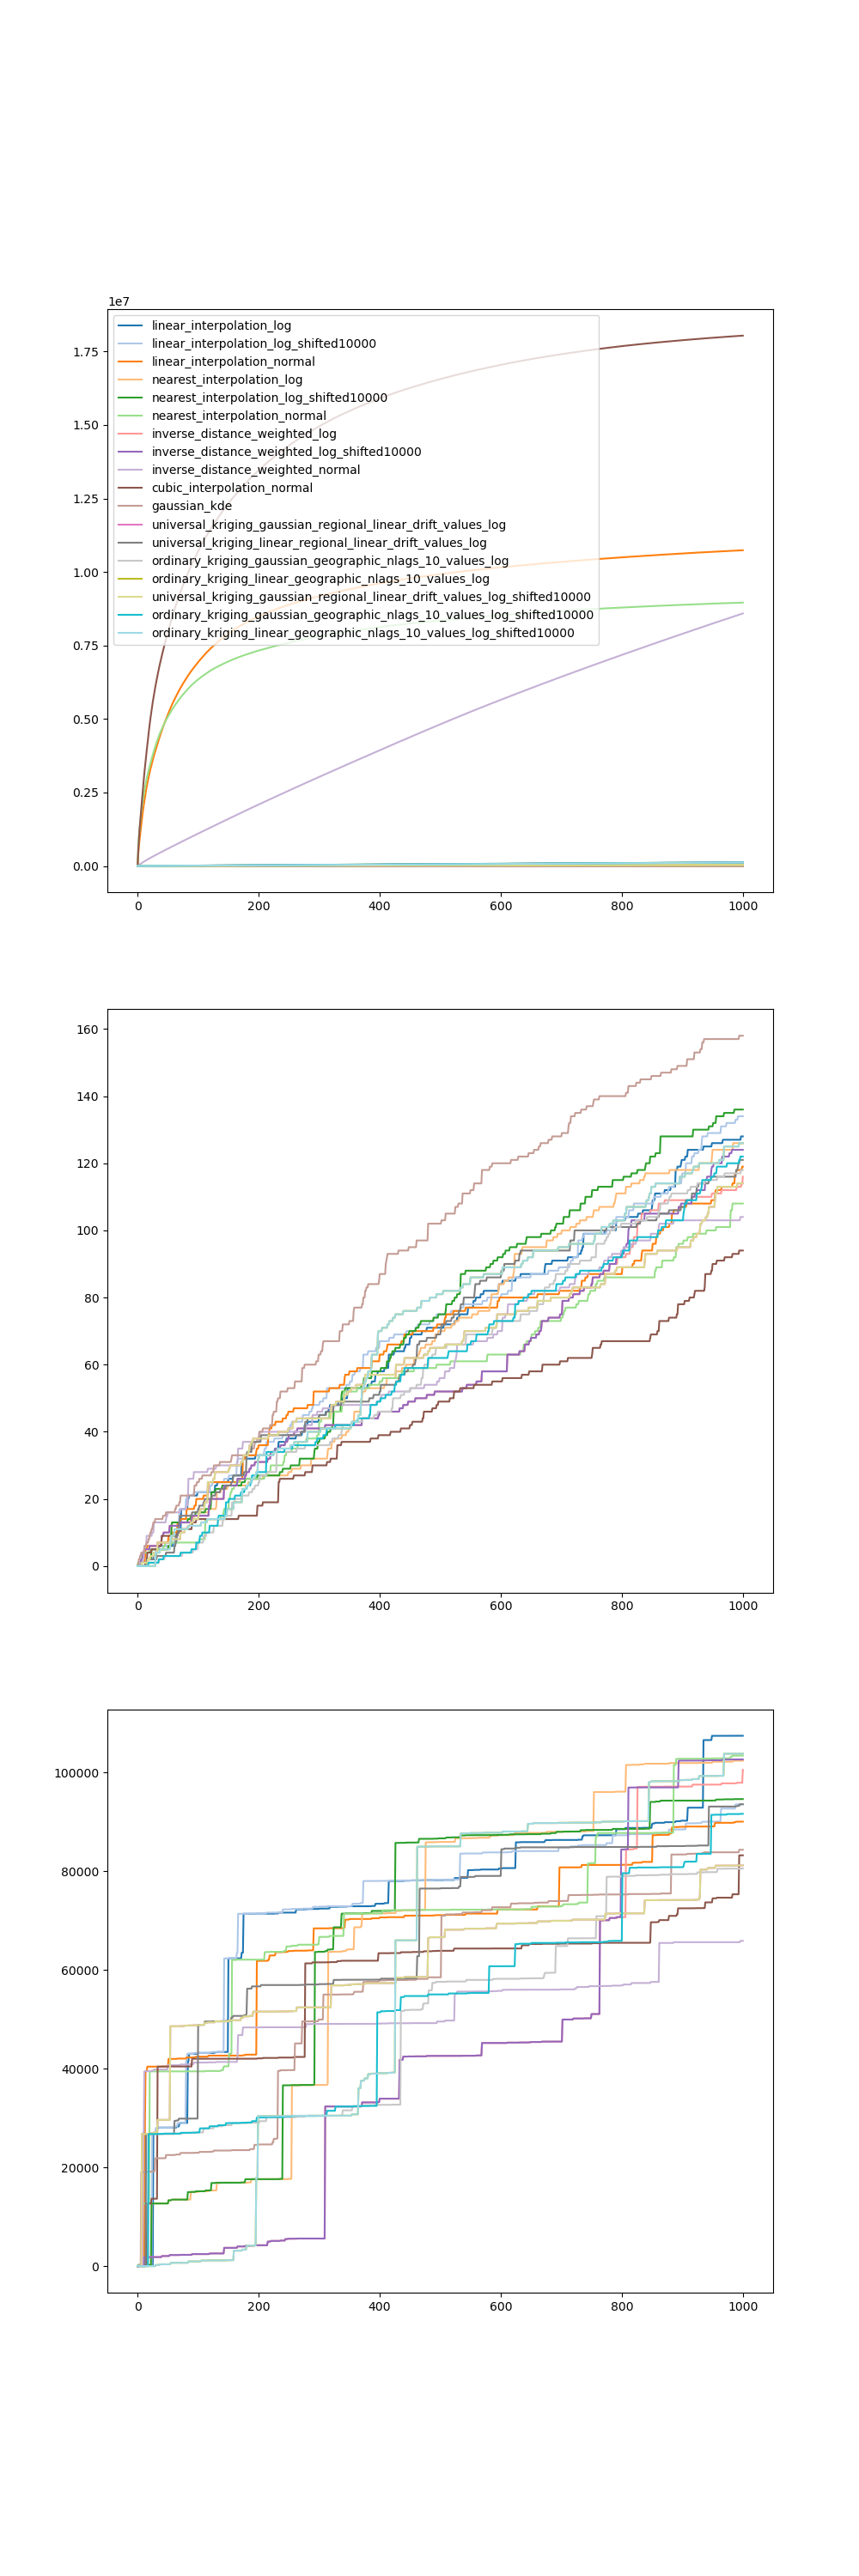

In [15]:
%matplotlib notebook
interpolations = ["linear_interpolation_log", "linear_interpolation_log_shifted10000", "linear_interpolation_normal", #SEE HOW MUCH SHIFTED IS BEST
                  "nearest_interpolation_log", "nearest_interpolation_log_shifted10000", "nearest_interpolation_normal",
                  "inverse_distance_weighted_log", "inverse_distance_weighted_log_shifted10000", "inverse_distance_weighted_normal", "inverse_distance_weighted_power_0.2_normal"
                  "cubic_interpolation_log", "cubic_interpolation_normal",
                  "gaussian_kde", 
                  "universal_kriging_gaussian_regional_linear_drift_values_log", "universal_kriging_linear_regional_linear_drift_values_log",
                  "ordinary_kriging_gaussian_geographic_nlags_10_values_log", "ordinary_kriging_linear_geographic_nlags_10_values_log",\
                  "universal_kriging_gaussian_regional_linear_drift_values_log_shifted10000", # don't have time to generate this one mb "universal_kriging_linear_regional_linear_drift_values_log_shifted10000"
                  "ordinary_kriging_gaussian_geographic_nlags_10_values_log_shifted10000", "ordinary_kriging_linear_geographic_nlags_10_values_log_shifted10000",
                 ]
xs = []
y1s = []
y2s = []
y3s = []
labels = []
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,30), clear = True)

for size in [3]:
    for interpchoose in interpolations:
        todir = os.path.join(os.getcwd(), 'tradeoff_results', str(size)+'x' + str(size), interpchoose)
        if (not os.path.exists(todir)):
            continue
        with open(todir, 'rb') as fp:
            res = pickle.load(fp)
            x = res[0]
            y1 = res[1]
            y2 = res[2]
            y3 = res[3]
            labels.append(interpchoose)
            xs.append(x)
            y1s.append(y1)
            y2s.append(y2)
            y3s.append(y3)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(xs))]
colornum = 0
for ind in range(len(xs)):
    ax[0].plot(xs[ind], y1s[ind], label = labels[ind], color = colors[colornum])
    ax[1].plot(xs[ind], y2s[ind], label = labels[ind], color = colors[colornum])
    ax[2].plot(xs[ind], y3s[ind], label = labels[ind], color = colors[colornum])
    colornum += 1
    
ax[0].legend()
# ax[1].legend()
# ax[2].legend()
plt.show()

In [37]:
xs = []
y1s = []
y2s = []
y3s = []
labels = []
for size in [3]:
    for interpchoose in interpolations:
        todir = os.path.join(os.getcwd(), 'tradeoff_results', str(size)+'x' + str(size), interpchoose)
        if (not os.path.exists(todir)):
            continue
        with open(todir, 'rb') as fp:
            res = pickle.load(fp)
            x = res[0]
            y1 = res[1]
            y2 = res[2]
            y3 = res[3]
            labels.append(interpchoose)
            xs.append(x)
            y1s.append(y1)
            y2s.append(y2)
            y3s.append(y3)
scores = {}
for xvalue in range(0,1001,5):
    ar = []
    for ind in range(len(xs)):
        ar.append((y2s[ind][xvalue], labels[ind]))
    ar.sort()
#     print(ar)
    for i in range(len(xs)):
        if (ar[i][1] not in scores.keys()):
            scores[ar[i][1]] = i
        else:
            scores[ar[i][1]] += i
            
    ar = []
    for ind in range(len(xs)):
        ar.append((y3s[ind][xvalue], labels[ind]))
    ar.sort()
#     print(ar)
    for i in range(len(xs)):
        if (ar[i][1] not in scores.keys()):
            scores[ar[i][1]] = i
        else:
            scores[ar[i][1]] += i
end = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}
for i in end.keys():
    print(i + ":" + str(end[i]))

cubic_interpolation_normal:1437
inverse_distance_weighted_log:1642
ordinary_kriging_gaussian_geographic_nlags_10_values_log:1817
ordinary_kriging_gaussian_geographic_nlags_10_values_log_shifted10000:2108
inverse_distance_weighted_log_shifted10000:2131
inverse_distance_weighted_normal:2620
universal_kriging_gaussian_regional_linear_drift_values_log:2997
nearest_interpolation_normal:3259
universal_kriging_gaussian_regional_linear_drift_values_log_shifted10000:3399
ordinary_kriging_linear_geographic_nlags_10_values_log:3867
linear_interpolation_normal:4102
nearest_interpolation_log:4139
universal_kriging_linear_regional_linear_drift_values_log:4243
ordinary_kriging_linear_geographic_nlags_10_values_log_shifted10000:4269
nearest_interpolation_log_shifted10000:4735
gaussian_kde:4779
linear_interpolation_log:4869
linear_interpolation_log_shifted10000:5093
